## Problem Statement: 

A digital media company (for example Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
dataset = pd.read_csv('mediacompany.csv')
dataset = dataset.drop('Unnamed: 7', axis=1)

In [0]:
dataset.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [0]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [0]:
dataset.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [0]:
#Deriving no. of days since the show started
from datetime import date

d0 = pd.to_datetime(date(2017, 2, 28))
d1 = dataset.Date
difference = d1 - d0
dataset['day'] = difference

In [0]:
dataset.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [0]:
#cleaning days
dataset['day'] = dataset['day'].astype(str)
dataset['day'] = dataset['day'].map(lambda x: x[:2])
dataset['day'] = dataset['day'].astype(int) 

In [0]:
dataset.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


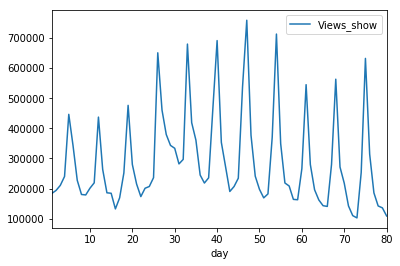

In [0]:
dataset.plot.line(x ='day', y = 'Views_show')

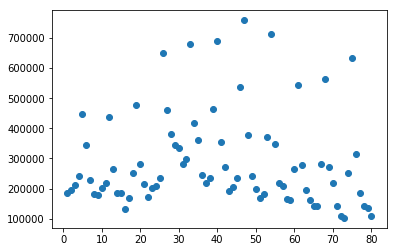

In [0]:
#Scatter plot
colors = (0, 0, 0)
area = np.pi*3
plt.scatter(dataset['day'], dataset['Views_show'])

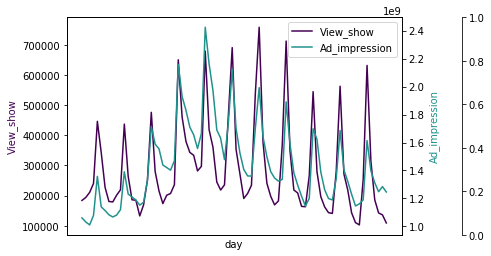

In [0]:
#plotting for day vs Views_show and days vs Ad_impression
fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel("day")
host.set_ylabel("View_show")
par1.set_ylabel("Ad_impression")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(0.9)

p1, = host.plot(dataset['day'], dataset['Views_show'], color=color1, label='View_show')
p2, = par1.plot(dataset['day'], dataset['Ad_impression'], color=color2, label='Ad_impression')

lns=[p1,p2]
host.legend(handles=lns, loc='best')

#right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))

#no. of x-ticks
par2.xaxis.set_ticks([])

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.show()

In [0]:
#New dervied column
dataset['weekday'] = (dataset['day']+3)%7
dataset['weekday'].replace(0, 7, inplace=True)
dataset['weekday'] = dataset['weekday'].astype(int)
dataset.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


### Linear Model (lm1) Weekday and Visitors

In [0]:
# Feature variables - Visitiors, Weekday
X = dataset[['Visitors','weekday']]

#Response Variable
y= dataset['Views_show']

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#pip install scipy==1.2 --upgrade

In [0]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Sat, 01 Jun 2019   Prob (F-statistic):           8.01e-12
Time:                        20:07:18   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
#Create a new column - to check if its a weekend or not

def cond(i):
  if i ==1 or i ==7: return 1
  else: return 0

dataset['weekend'] = [cond(i) for i in dataset['weekday']]

dataset.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


### 2nd Linear Model (lm2) Weekend and Visitors

In [0]:
X = dataset[['Visitors', 'weekend']]
y = dataset['Views_show']

In [0]:
import statsmodels.api as sm
X = sm.add_constant(X)
lm_2 = sm.OLS(y,X).fit()
print(lm_2.summary())

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Sat, 01 Jun 2019   Prob (F-statistic):           2.51e-12
Time:                        20:07:18   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

### 3rd Linear Model (lm3) Weekday, Visitors, character_A

In [0]:
X = dataset[['Visitors', 'weekend', 'Character_A']]
y = dataset['Views_show']

import statsmodels.api as sm
X = sm.add_constant(X)
lm_3 = sm.OLS(y,X).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Sat, 01 Jun 2019   Prob (F-statistic):           1.53e-14
Time:                        20:07:19   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
# Creating a new column - lag variable

dataset['Lag_views'] = np.roll(dataset['Views_show'], 1)
dataset['Lag_views'].replace(108961,0, inplace=True)
dataset.head()


,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend,Lag_views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061


### 4th Linear Model (lm3) Weekday, Visitors, character_A, Lag_views

In [0]:
X = dataset[['Visitors', 'weekend', 'Character_A', 'Lag_views']]
y = dataset['Views_show']

import statsmodels.api as sm
X = sm.add_constant(X)
lm_4 = sm.OLS(y,X).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Sat, 01 Jun 2019   Prob (F-statistic):           3.16e-21
Time:                        20:07:19   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


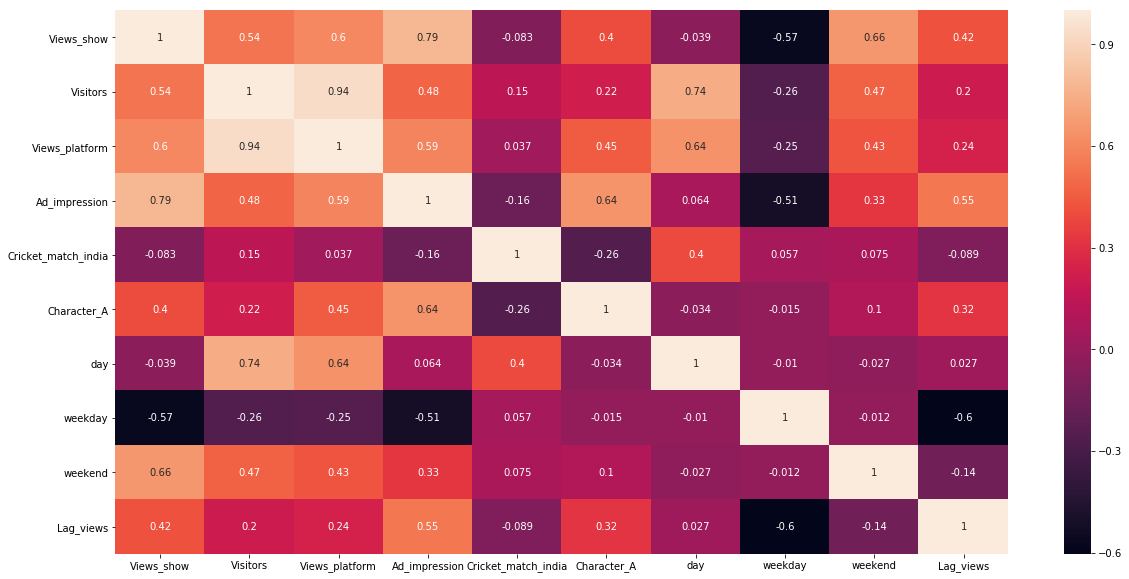

In [0]:
plt.figure(figsize = (20,10))
sns.heatmap(dataset.corr(), annot = True)

### 5th Linear Model - Character_A, weekend, Views_platform

In [0]:
X = dataset[['weekend', 'Character_A', 'Views_platform']]
y = dataset['Views_show']

import statsmodels.api as sm
X = sm.add_constant(X)
lm_5 = sm.OLS(y,X).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Sat, 01 Jun 2019   Prob (F-statistic):           3.59e-15
Time:                        20:14:50   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### 6th Linear Model - Character_A, weekend, Visitors

In [0]:
X = dataset[['weekend', 'Character_A', 'Visitors']]
y = dataset['Views_show']

import statsmodels.api as sm
X = sm.add_constant(X)
lm_6 = sm.OLS(y,X).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Sat, 01 Jun 2019   Prob (F-statistic):           1.53e-14
Time:                        20:15:12   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### 7th Linear Model - Character_A, weekend, Visitors, Ad impressions

In [0]:
X = dataset[['weekend', 'Character_A', 'Visitors', 'Ad_impression']]
y = dataset['Views_show']

import statsmodels.api as sm
X = sm.add_constant(X)
lm_7 = sm.OLS(y,X).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Sat, 01 Jun 2019   Prob (F-statistic):           1.10e-25
Time:                        20:18:30   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### 8th Linear Model - Character_A, weekend, Ad impressions

In [0]:
X = dataset[['weekend', 'Character_A', 'Ad_impression']]
y = dataset['Views_show']

import statsmodels.api as sm
X = sm.add_constant(X)
lm_8 = sm.OLS(y,X).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sat, 01 Jun 2019   Prob (F-statistic):           1.05e-26
Time:                        20:21:04   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### 9th Linear Model - Character_A, Visitors, weekend, Ad impressions_million, Cricket_match_india

In [0]:
dataset['Ad_impression_million'] = dataset['Ad_impression']/1000000
X = dataset[['weekend', 'Character_A', 'Visitors', 'Ad_impression_million', 'Cricket_match_india']]
y = dataset['Views_show']

import statsmodels.api as sm
X = sm.add_constant(X)
lm_9 = sm.OLS(y,X).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     60.67
Date:                Sat, 01 Jun 2019   Prob (F-statistic):           8.61e-25
Time:                        20:35:34   Log-Likelihood:                -1003.9
No. Observations:                  80   AIC:                             2020.
Df Residuals:                      74   BIC:                             2034.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.867e+

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### 10th Linear Model - Character_A, Visitors, weekend, Ad impressions_million, Cricket_match_india

In [0]:
dataset['Ad_impression_million'] = dataset['Ad_impression']/1000000
X = dataset[['weekend', 'Character_A', 'Ad_impression_million']]
y = dataset['Views_show']

import statsmodels.api as sm
X = sm.add_constant(X)
lm_10 = sm.OLS(y,X).fit()
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sat, 01 Jun 2019   Prob (F-statistic):           1.05e-26
Time:                        20:42:02   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.661e+

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Predictions using Model 10

In [0]:
from sklearn.metrics import mean_squared_error, r2_score
Predicted_views = lm_10.predict(X)
mse = mean_squared_error(dataset['Views_show'], Predicted_views)
r_squared = r2_score(dataset['Views_show'], Predicted_views)
print(f'Mean squared error: {mse}')
print(f'r_square_value: {r_squared}')

Mean squared error: 4677651616.2534075
r_square_value: 0.802643446857565


Text(0, 0.5, 'Views')

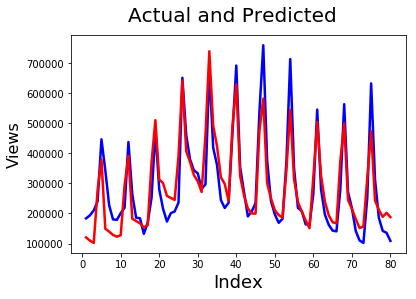

In [0]:
# Visualization of Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c, dataset['Views_show'], color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, Predicted_views, color='red', linewidth=2.5, linestyle='-')
fig.suptitle('Actual and Predicted', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Views', fontsize=16)

Text(0, 0.5, 'Actual-Predicted')

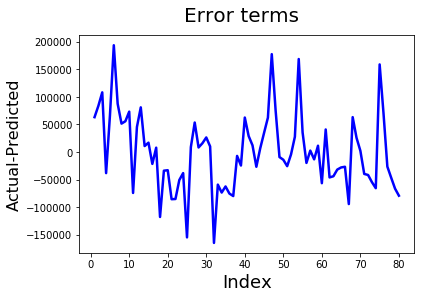

In [0]:
# Visualization of Error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c, dataset['Views_show']-Predicted_views, color='blue', linewidth=2.5, linestyle='-')
fig.suptitle('Error terms', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Actual-Predicted', fontsize=16)

### Predictions using Model 6

In [0]:
X = dataset[['weekend', 'Character_A', 'Visitors']]
y = dataset['Views_show']

import statsmodels.api as sm
X = sm.add_constant(X)
lm_6 = sm.OLS(y,X).fit()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
from sklearn.metrics import mean_squared_error, r2_score
Predicted_views = lm_6.predict(X)
mse = mean_squared_error(dataset['Views_show'], Predicted_views)
r_squared = r2_score(dataset['Views_show'], Predicted_views)
print(f'Mean squared error: {mse}')
print(f'r_square_value: {r_squared}')

Mean squared error: 9815432480.451523
r_square_value: 0.585873408097934


Text(0, 0.5, 'Views')

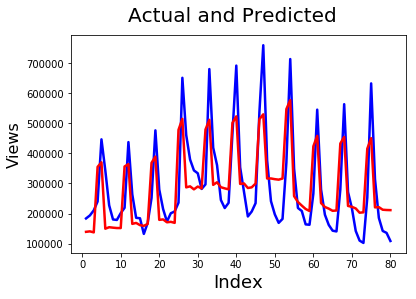

In [0]:
# Visualization of Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c, dataset['Views_show'], color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, Predicted_views, color='red', linewidth=2.5, linestyle='-')
fig.suptitle('Actual and Predicted', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Views', fontsize=16)

Text(0, 0.5, 'Actual-Predicted')

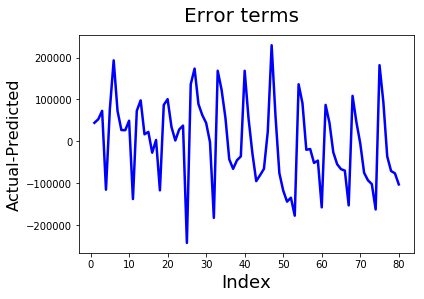

In [0]:
# Visualization of Error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c, dataset['Views_show']-Predicted_views, color='blue', linewidth=2.5, linestyle='-')
fig.suptitle('Error terms', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Actual-Predicted', fontsize=16)